# Project 1 - Mushroom Classification
### Damian Franco
### Meiling Traeger
### Trey Sampson

This project demonstrates a Machine Learning model made by Random Forest Models and decision trees. The data that is used relates to various species of mushrooms that our model attempts to classify as poisionous or edible.

In [3]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sbs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from google.colab import files
import os 
import sklearn as ski
import math
import scipy.stats as stats
from pprint import pprint

In [4]:
# Comment in if wanting to load data directly from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Create and load data

### Reference(s)

https://medium.com/geekculture/how-to-load-a-dataset-from-the-google-drive-to-google-colab-67d0478bc634#:~:text=Loading%20a%20Dataset%20from%20the%20Google%20Drive%20to%20Google%20Colab&text=Click%20the%20link%20given.,keys%20for%20your%20google%20drive.&text=Now%20add%20it%20in%20the%20early%20appeared%20shell%20and%20press%20enter.&text=Now%20your%20google%20drive%20is%20mounted.

https://datatofish.com/create-pandas-dataframe/

In [128]:
df_train = pd.read_csv("drive/My Drive/machineLearning/shroomsProj/training.csv")
df_test = pd.read_csv("drive/My Drive/machineLearning/shroomsProj/testing.csv")
df_solution = pd.read_csv("drive/My Drive/machineLearning/shroomsProj/sample_solution.csv")

In [200]:
fullAttList = list(df_train.columns.values)

# Checking data

### Reference(s)

https://www.geeksforgeeks.org/how-to-print-an-entire-pandas-dataframe-in-python/

In [7]:
print(fullAttList)
print(len(fullAttList))

['id', 'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-ar', 'stalk-surface-br', 'stalk-color-ar', 'stalk-color-br', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
24


In [8]:
for col in df_train:
  print('Att:', col, 'with values', df_train[col].unique())

Att: id with values [1000 1001 1002 ... 8122 8123 8124]
Att: class with values ['e' 'p']
Att: cap-shape with values ['x' 'f' 'b' 'k' 's' 'c']
Att: cap-surface with values ['f' 'y' 's' 'g']
Att: cap-color with values ['g' 'y' 'n' 'e' 'w' 'u' 'b' 'c' 'p' 'r']
Att: bruises with values ['f' 't']
Att: odor with values ['n' 'f' 'l' 's' 'a' 'c' 'y' 'p' 'm']
Att: gill-attachment with values ['f' 'a']
Att: gill-spacing with values ['w' 'c']
Att: gill-size with values ['b' 'n']
Att: gill-color with values ['n' 'h' 'w' 'b' 'p' 'k' 'e' 'u' 'g' 'y' 'o' 'r']
Att: stalk-shape with values ['t' 'e']
Att: stalk-root with values ['e' 'b' 'c' '?' 'r']
Att: stalk-surface-ar with values ['s' 'k' 'f' 'y']
Att: stalk-surface-br with values ['s' 'k' 'f' 'y']
Att: stalk-color-ar with values ['w' 'g' 'n' 'p' 'b' 'e' 'o' 'c' 'y']
Att: stalk-color-br with values ['w' 'p' 'b' 'n' 'e' 'g' 'o' 'y' 'c']
Att: veil-type with values ['p']
Att: veil-color with values ['w' 'n' 'o' 'y']
Att: ring-number with values ['o' 't'

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7125 entries, 0 to 7124
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 7125 non-null   int64 
 1   class              7125 non-null   object
 2   cap-shape          7125 non-null   object
 3   cap-surface        7125 non-null   object
 4   cap-color          7125 non-null   object
 5   bruises            7125 non-null   object
 6   odor               7125 non-null   object
 7   gill-attachment    7125 non-null   object
 8   gill-spacing       7125 non-null   object
 9   gill-size          7125 non-null   object
 10  gill-color         7125 non-null   object
 11  stalk-shape        7125 non-null   object
 12  stalk-root         7125 non-null   object
 13  stalk-surface-ar   7125 non-null   object
 14  stalk-surface-br   7125 non-null   object
 15  stalk-color-ar     7125 non-null   object
 16  stalk-color-br     7125 non-null   object


In [10]:
df_train.head()

,id,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-br,stalk-color-ar,stalk-color-br,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1000,e,x,f,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g
1,1001,e,f,y,g,t,n,f,c,b,...,s,g,w,p,w,o,p,k,y,d
2,1002,e,f,f,g,t,n,f,c,b,...,s,g,p,p,w,o,p,n,v,d
3,1003,p,f,y,y,f,f,f,c,b,...,k,n,p,p,w,o,l,h,v,g
4,1004,e,b,y,y,t,l,f,c,b,...,s,w,w,p,w,o,p,n,s,g


In [11]:
df_test.head()

,id,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-br,stalk-color-ar,stalk-color-br,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,n,v,u
1,2,f,y,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,p
2,3,f,f,g,t,n,f,c,b,w,...,s,g,p,p,w,o,p,n,y,d
3,4,f,f,y,f,f,f,c,b,p,...,k,b,b,p,w,o,l,h,y,p
4,5,x,y,y,t,l,f,c,b,n,...,y,w,w,p,w,o,p,n,y,p


In [12]:
df_solution.head()

,id,class
0,1,p
1,2,p
2,3,e
3,4,e
4,5,p


# Handle missing data

### Reference(s)

https://www.studytonight.com/pandas/pandas-dataframe-backfill-method 

https://towardsdatascience.com/8-methods-for-handling-missing-values-with-python-pandas-842544cdf891 (#6 approach)

In [129]:
print(df_train['stalk-root'])

0       e
1       b
2       b
3       b
4       c
       ..
7120    b
7121    b
7122    e
7123    b
7124    b
Name: stalk-root, Length: 7125, dtype: object


In [130]:
'?' in df_train['stalk-root'].values

True

In [131]:
'?' in df_test['stalk-root'].values

True

In [132]:
print(df_train['stalk-root'].value_counts())

b    3314
?    2159
e     994
c     490
r     168
Name: stalk-root, dtype: int64


In [133]:
print(df_test['stalk-root'].value_counts())

b    462
?    321
e    126
c     66
r     24
Name: stalk-root, dtype: int64


In [134]:
df_train[['class', 'stalk-root']]

,class,stalk-root
0,e,e
1,e,b
2,e,b
3,p,b
4,e,c
...,...,...
7120,e,b
7121,p,b
7122,e,e
7123,p,b


In [135]:
df_train['stalk-root'] = df_train['stalk-root'].replace(to_replace = '?', value = np.nan)
df_test['stalk-root'] = df_test['stalk-root'].replace(to_replace = '?', value = np.nan)

In [136]:
df_train.loc[7, 'stalk-root']

nan

In [137]:
'?' in df_train['stalk-root'].values

False

In [138]:
'?' in df_test['stalk-root'].values

False

In [139]:
np.nan in df_train['stalk-root'].values

False

In [140]:
np.nan in df_train['stalk-root'].values

False

In [141]:
df_train['stalk-root'] = df_train['stalk-root'].fillna(method='bfill')
df_test['stalk-root'] = df_test['stalk-root'].fillna(method='bfill')

In [142]:
np.nan in df_train['stalk-root'].values

False

In [143]:
df_train.loc[7, 'stalk-root']

'c'

In [144]:
print(df_train['stalk-root'].value_counts())

b    4765
e    1420
c     686
r     254
Name: stalk-root, dtype: int64


In [145]:
print(df_test['stalk-root'].value_counts())

b    682
e    178
c     95
r     44
Name: stalk-root, dtype: int64


# Find Entropy

https://medium.com/mlearning-ai/determine-entropy-and-information-gain-in-a-dataset-using-python-3036b9314825

https://github.com/recluze/stats-prob-cs/blob/master/07-decision-tree.ipynb

In [30]:
def entropy(column):
  n_labels = len(column)

  if n_labels <= 1:
    return 0

  value, counts = np.unique(column, return_counts=True)
  probs = counts / n_labels
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  # Compute entropy
  ent = 0.
  for i in probs:
    ent -= i * math.log(i, 2)

  return ent

  '''
  prob = column.value_counts(normalize=True)
  ent = -1 * np.sum(np.log2(prob) * prob)
  return ent
  '''

  '''
  unique, count = np.unique(column, return_counts=True)
  prob = count/len(column)
  ent = np.sum((-1)*prob*np.log2(prob))
  return ent
  '''


In [31]:
testEnt = entropy(df_train['stalk-root'])
print('Entropy test =', testEnt)

Entropy test = 1.3485055379509638


In [32]:
def calc_total_entropy(train_data, label, class_list):
  total_row = train_data.shape[0]
  total_entr = 0
    
  for c in class_list:
    total_class_count = train_data[train_data[label] == c].shape[0]
    total_class_entr = -(total_class_count/total_row)*np.log2(total_class_count/total_row)
    total_entr += total_class_entr 
    
  return total_entr

In [33]:
totalEnt = calc_total_entropy(df_train, 'class', ['e', 'p'])
print('Total Dataset Entropy test =', totalEnt)

Total Dataset Entropy test = 0.9990466112580625


# Find Gini Index

https://medium.com/mlearning-ai/determine-entropy-and-information-gain-in-a-dataset-using-python-3036b9314825

In [34]:
def gini(input_list):
    #get list of all elements in input
    elements = []
    elem_count = []
    count = 0
    for i in input_list:
        if i in elements:
            count = count + 1
        else:
            count = count + 1
            elements.append(i)
            
    #get count of each element in list
    elem_count = np.zeros(len(elements))
    for e in range(len(elements)):
        elem_count[e] = input_list.count(elements[e])
            
    #calculate probability of each element appearing
    prob = elem_count / count
    
    #square probabilities and subtract from 1
    sq_prob = prob ** 2
    gini_index = 1 - sum(sq_prob)
    
    #return
    return gini_index

In [35]:
giniTest = gini(list(df_train['stalk-root']))
print('Gini Index test =', giniTest)

Gini Index test = 0.5024834816866728


# Find Misclassification Error

https://www.kaggle.com/code/andreicosma/decision-trees-misclassification-index

In [36]:
def misc_err(input_list):
    #get list of all elements in input
    elements = []
    elem_count = []
    count = 0
    for i in input_list:
        if i in elements:
            count = count + 1
        else:
            count = count + 1
            elements.append(i)
            
    #get count of each element in list
    elem_count = np.zeros(len(elements))
    for e in range(len(elements)):
        elem_count[e] = input_list.count(elements[e])
            
    #calculate probability of each element appearing
    prob = elem_count / count
    
    #find max probability and subtract from 1
    misc = 1 - max(prob)
    
    #return
    return misc

In [37]:
meTest = misc_err(list(df_train['stalk-root']))
print('Misclassification Error test =', meTest)

Misclassification Error test = 0.33122807017543865


# Find Impurity

https://medium.com/mlearning-ai/determine-entropy-and-information-gain-in-a-dataset-using-python-3036b9314825

In [38]:
def compute_impurity(feature, info_type):
  # probs = feature.value_counts(normalize=True)
  impurity = 0
  if info_type == 'entropy':
    impurity = entropy(feature)
    # impurity = -1 * np.sum(np.log2(probs) * probs)
  elif info_type == 'gini':
    impurity = gini(list(feature))
    # impurity = 1 - np.sum(np.square(probs))
  elif info_type == 'me':
    impurity = misc_err(list(feature))
    # impurity = 1 - max(probs)
        
  return impurity

In [39]:
entImpureTest = compute_impurity(df_train['stalk-root'], 'entropy')
giniImpureTest = compute_impurity(df_train['stalk-root'], 'gini')
meImpureTest = compute_impurity(df_train['stalk-root'], 'me')

print('Impurity using Entropy =', entImpureTest)
print('Impurity using Gini Index =', giniImpureTest)
print('Impurity using ME =', meImpureTest)

Impurity using Entropy = 1.3485055379509638
Impurity using Gini Index = 0.5024834816866728
Impurity using ME = 0.33122807017543865


In [40]:
def calcAllImpure(train_data, info_type):
  print('Impurity Type: ', info_type)
  for feat in train_data:
    impurity = compute_impurity(df_train[feat], info_type)
    print('', feat, 'with', impurity, 'impurity')

In [41]:
calcAllImpure(df_train.drop('id', axis=1), 'entropy')

Impurity Type:  entropy
 class with 0.9990466112580625 impurity
 cap-shape with 1.6516620637045714 impurity
 cap-surface with 1.5736685811515485 impurity
 cap-color with 2.5057877955516616 impurity
 bruises with 0.9787111668332235 impurity
 odor with 2.321580305413364 impurity
 gill-attachment with 0.16782565499181124 impurity
 gill-spacing with 0.6389895947588495 impurity
 gill-size with 0.8933758683017097 impurity
 gill-color with 3.0243900342569066 impurity
 stalk-shape with 0.9864497419502245 impurity
 stalk-root with 1.3485055379509638 impurity
 stalk-surface-ar with 1.2237657751888562 impurity
 stalk-surface-br with 1.4026116378878293 impurity
 stalk-color-ar with 1.9387543341817426 impurity
 stalk-color-br with 1.9794215829539703 impurity
 veil-type with 0 impurity
 veil-color with 0.19185352943164782 impurity
 ring-number with 0.410678207756062 impurity
 ring-type with 1.5383407520103716 impurity
 spore-print-color with 2.1956769488408066 impurity
 population with 2.00104894327

In [42]:
calcAllImpure(df_train.drop('id', axis=1), 'gini')

Impurity Type:  gini
 class with 0.49933930686365047 impurity
 cap-shape with 0.6326574724530625 impurity
 cap-surface with 0.6599746580486303 impurity
 cap-color with 0.8002690403200985 impurity
 bruises with 0.48531643213296394 impurity
 odor with 0.7249465361649738 impurity
 gill-attachment with 0.04844995013850406 impurity
 gill-spacing with 0.2714645589412126 impurity
 gill-size with 0.4279332717759311 impurity
 gill-color with 0.8587591702062173 impurity
 stalk-shape with 0.49063711911357344 impurity
 stalk-root with 0.5024834816866728 impurity
 stalk-surface-ar with 0.5051301939058173 impurity
 stalk-surface-br with 0.5457570944906125 impurity
 stalk-color-ar with 0.6338093148661126 impurity
 stalk-color-br with 0.6443186703601109 impurity
 veil-type with 0.0 impurity
 veil-color with 0.04689011511234231 impurity
 ring-number with 0.14047308587257612 impurity
 ring-type with 0.62015535118498 impurity
 spore-print-color with 0.760786811942136 impurity
 population with 0.678249228

In [43]:
calcAllImpure(df_train.drop('id', axis=1), 'me')

Impurity Type:  me
 class with 0.4818245614035088 impurity
 cap-shape with 0.5465263157894737 impurity
 cap-surface with 0.600701754385965 impurity
 cap-color with 0.7190175438596491 impurity
 bruises with 0.4143157894736842 impurity
 odor with 0.5670175438596492 impurity
 gill-attachment with 0.024842105263157888 impurity
 gill-spacing with 0.16196491228070176 impurity
 gill-size with 0.3101754385964912 impurity
 gill-color with 0.7870877192982456 impurity
 stalk-shape with 0.43157894736842106 impurity
 stalk-root with 0.33122807017543865 impurity
 stalk-surface-ar with 0.36378947368421055 impurity
 stalk-surface-br with 0.3953684210526316 impurity
 stalk-color-ar with 0.45066666666666666 impurity
 stalk-color-br with 0.46203508771929824 impurity
 veil-type with 0.0 impurity
 veil-color with 0.023859649122807025 impurity
 ring-number with 0.07564912280701752 impurity
 ring-type with 0.5127017543859649 impurity
 spore-print-color with 0.7080701754385965 impurity
 population with 0.5034

# Calculate Information Gain

### Reference(s)

https://towardsdatascience.com/entropy-and-information-gain-in-decision-trees-c7db67a3a293 

https://machinelearningmastery.com/information-gain-and-mutual-information/

https://towardsai.net/p/l/decision-tree-splitting-entropy-vs-misclassification-error


In [44]:
def info_gain(df, target, descriptive_feature, info_type):
  target_entropy = compute_impurity(df[target], info_type)

  # entropy_list to store the entropy of each partition
  # weight_list to store the relative number of observations in each partition
  entropy_list = list()
  weight_list = list()
    
  # loop over each level of the descriptive feature
  # to partition the dataset with respect to that level
  # and compute the entropy and the weight of the level's partition
  for level in df[descriptive_feature].unique():
    df_feature_level = df[df[descriptive_feature] == level]
    entropy_level = compute_impurity(df_feature_level[target], info_type)
    entropy_list.append(round(entropy_level, 3))
    weight_level = len(df_feature_level) / len(df)
    weight_list.append(round(weight_level, 3))

  feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    
  information_gain = target_entropy - feature_remaining_impurity
  
  return information_gain

In [45]:
def calculate_entropy(data):
    """
    Calculates the entropy of a dataset.
    """
    class_counts = data.groupby('class').size()
    total_count = class_counts.sum()
    class_probabilities = class_counts / total_count
    entropy = -np.sum(class_probabilities * np.log2(class_probabilities))
    return entropy

In [46]:
def calc_information_gain(data, attribute):
    """
    Calculates the information gain of an attribute in a dataset.
    """
    entropy = calculate_entropy(data)
    attribute_values = data[attribute].unique()
    weighted_entropy = 0
    for value in attribute_values:
        subset = data[data[attribute] == value]
        subset_entropy = calculate_entropy(subset)
        weighted_entropy += (len(subset) / len(data)) * subset_entropy
    info_gain = entropy - weighted_entropy
    return info_gain

In [47]:
entGainTest = info_gain(df_train, 'class', 'stalk-root', 'entropy')
giniGainTest = info_gain(df_train, 'class', 'stalk-root', 'gini')
meGainTest = info_gain(df_train, 'class', 'stalk-root', 'me')

print('Information Gain using Entropy test =', entGainTest)
print('Information Gain using Gini test =', giniGainTest)
print('Information Gain using ME test =', meGainTest)

Information Gain using Entropy test = 0.04053961125806238
Information Gain using Gini test = 0.027291306863650444
Information Gain using ME test = 0.08024056140350877


In [48]:
def calcAllInfoGain(train_data, info_type):
  print('Impurity Type: ', info_type)
  for feat in train_data:
    info_g = info_gain(train_data, 'class', feat, 'entropy')
    # info_g = calc_information_gain(train_data, feat)
    print('', feat, 'with', info_g, 'info gain')

In [49]:
calcAllInfoGain(df_train.drop('id', axis=1), 'entropy')

Impurity Type:  entropy
 class with 0.9990466112580625 info gain
 cap-shape with 0.05036061125806246 info gain
 cap-surface with 0.029402611258062428 info gain
 cap-color with 0.03601361125806257 info gain
 bruises with 0.19450261125806245 info gain
 odor with 0.9115806112580624 info gain
 gill-attachment with 0.0135716112580625 info gain
 gill-spacing with 0.10203461125806257 info gain
 gill-size with 0.22826661125806247 info gain
 gill-color with 0.41465061125806246 info gain
 stalk-shape with 0.008022611258062584 info gain
 stalk-root with 0.04053961125806238 info gain
 stalk-surface-ar with 0.2856796112580625 info gain
 stalk-surface-br with 0.2752656112580625 info gain
 stalk-color-ar with 0.2576116112580624 info gain
 stalk-color-br with 0.2451246112580625 info gain
 veil-type with 4.661125806249e-05 info gain
 veil-color with 0.02304661125806251 info gain
 ring-number with 0.038694611258062395 info gain
 ring-type with 0.32309361125806246 info gain
 spore-print-color with 0.4819

In [50]:
calcAllInfoGain(df_train.drop('id', axis=1), 'gini')

Impurity Type:  gini
 class with 0.9990466112580625 info gain
 cap-shape with 0.05036061125806246 info gain
 cap-surface with 0.029402611258062428 info gain
 cap-color with 0.03601361125806257 info gain
 bruises with 0.19450261125806245 info gain
 odor with 0.9115806112580624 info gain
 gill-attachment with 0.0135716112580625 info gain
 gill-spacing with 0.10203461125806257 info gain
 gill-size with 0.22826661125806247 info gain
 gill-color with 0.41465061125806246 info gain
 stalk-shape with 0.008022611258062584 info gain
 stalk-root with 0.04053961125806238 info gain
 stalk-surface-ar with 0.2856796112580625 info gain
 stalk-surface-br with 0.2752656112580625 info gain
 stalk-color-ar with 0.2576116112580624 info gain
 stalk-color-br with 0.2451246112580625 info gain
 veil-type with 4.661125806249e-05 info gain
 veil-color with 0.02304661125806251 info gain
 ring-number with 0.038694611258062395 info gain
 ring-type with 0.32309361125806246 info gain
 spore-print-color with 0.4819476

In [51]:
calcAllInfoGain(df_train.drop('id', axis=1), 'me')

Impurity Type:  me
 class with 0.9990466112580625 info gain
 cap-shape with 0.05036061125806246 info gain
 cap-surface with 0.029402611258062428 info gain
 cap-color with 0.03601361125806257 info gain
 bruises with 0.19450261125806245 info gain
 odor with 0.9115806112580624 info gain
 gill-attachment with 0.0135716112580625 info gain
 gill-spacing with 0.10203461125806257 info gain
 gill-size with 0.22826661125806247 info gain
 gill-color with 0.41465061125806246 info gain
 stalk-shape with 0.008022611258062584 info gain
 stalk-root with 0.04053961125806238 info gain
 stalk-surface-ar with 0.2856796112580625 info gain
 stalk-surface-br with 0.2752656112580625 info gain
 stalk-color-ar with 0.2576116112580624 info gain
 stalk-color-br with 0.2451246112580625 info gain
 veil-type with 4.661125806249e-05 info gain
 veil-color with 0.02304661125806251 info gain
 ring-number with 0.038694611258062395 info gain
 ring-type with 0.32309361125806246 info gain
 spore-print-color with 0.481947611

# Best Feature

In [52]:
def getBestFeature(train_data, label, class_list, used_feats, info_type):
  feature_list = train_data.columns.drop(label)
  for i in range(len(used_feats)):
    feature_list = feature_list.drop(used_feats[i])
                                     
  max_info_gain = -1
  max_info_feature = None
    
  for feature in feature_list:
    feature_info_gain = info_gain(df_train, 'class', feature, info_type)
    if max_info_gain < feature_info_gain:
      max_info_gain = feature_info_gain
      max_info_feature = feature
            
  return max_info_feature

In [53]:
topFeatureList = getBestFeature(df_train.drop('id', axis=1), 'class', ['e','p'], [], 'entropy')
print(topFeatureList)

odor


# Chi-Squared Tests

### Reference(s)

https://www.geeksforgeeks.org/python-pearsons-chi-square-test/

https://www.mathsisfun.com/data/chi-square-test.html

https://www.mathsisfun.com/data/chi-square-table.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2

In [54]:
#input_attr should be an attribute column, e.g. df_train['stalk-root']
#alpha should be between 0.01 and 0.99 inclusive
#returns true if input_attr is correlated with 'class' given the alpha provided
def chi2(input_attr, alpha):
  chi_sq = 0

  #contingency table of observed values
  cont_tab = pd.crosstab(df_train['class'], input_attr, margins=True, margins_name="Total")
  # print(cont_tab) #this is just to show the output below and can be deleted before final submission

  #calculate chi-square for given attribute
  row = df_train['class'].unique()
  col = input_attr.unique()
  for i in col:
    for j in row:
      obs = cont_tab[i][j]
      exp = cont_tab[i]['Total'] * cont_tab['Total'][j] / cont_tab['Total']['Total']
      chi_sq += ((obs - exp) ** 2) / exp

  #look up critical value in chi2 table and compare with chi_sq
  crit_val = stats.chi2.ppf(1-alpha, len(col)-1)
  # print("Critical Value: ", crit_val)
  # print("Chi2 Value: ", chi_sq)

  if chi_sq > crit_val:
    correlated = True
    # print("\nThere is evidence to show a correlation between the mushroom classification and the input attribute at a " + str(100 * alpha) + "% confidence interval.\n")
  else:
    correlated = False
    # print("\nThere is NO evidence to show a correlation between the mushroom classification and the input attribute at a " + str(100 * alpha) + "% confidence interval.\n")

  return correlated, chi_sq

In [55]:
chi2(df_train['odor'], 0.05)

(True, 6748.702441422537)

In [56]:
def calcAllChi2(train_data, alpha):
  print('Alpha: ', alpha)
  for feat in train_data:
    corr, chi2Curr = chi2(train_data[feat], alpha)
    # impurity = calc_information_gain(train_data, feat, 'class')
    print('', feat, 'with', chi2Curr, 'chi2 value and correlated =', corr)

In [57]:
calcAllChi2(df_train.drop('id', axis=1), 0.05)

Alpha:  0.05
 class with 7125.0 chi2 value and correlated = True
 cap-shape with 440.28613295844906 chi2 value and correlated = True
 cap-surface with 277.80281049337856 chi2 value and correlated = True
 cap-color with 337.6824310064077 chi2 value and correlated = True
 bruises with 1811.7526589925442 chi2 value and correlated = True
 odor with 6748.702441422537 chi2 value and correlated = True
 gill-attachment with 114.62674640816314 chi2 value and correlated = True
 gill-spacing with 872.6496883672187 chi2 value and correlated = True
 gill-size with 2063.170721166744 chi2 value and correlated = True
 gill-color with 3291.620994743821 chi2 value and correlated = True
 stalk-shape with 81.32652814877989 chi2 value and correlated = True
 stalk-root with 389.85261726426654 chi2 value and correlated = True
 stalk-surface-ar with 2470.67905713248 chi2 value and correlated = True
 stalk-surface-br with 2388.315662813604 chi2 value and correlated = True
 stalk-color-ar with 1986.528869250115

# ID3 Version 1 (Not Good ~49%)

### Reference(s)

https://www.kaggle.com/code/ankitmalik/decision-trees-from-scratch-id3

https://medium.com/geekculture/step-by-step-decision-tree-id3-algorithm-from-scratch-in-python-no-fancy-library-4822bbfdd88f

https://kindsonthegenius.com/blog/how-to-build-a-decision-tree-for-classification-step-by-step-procedure-using-entropy-and-gain/

In [58]:
def generate_sub_tree(feature_name, train_data, label, class_list):
  # dictionary of the count of unqiue feature value
  feature_value_count_dict = train_data[feature_name].value_counts(sort=False)
  # sub tree or node
  tree = {} 
    
  for feature_value, count in feature_value_count_dict.iteritems():
    # dataset with only feature_name = feature_value
    feature_value_data = train_data[train_data[feature_name] == feature_value]
        
    # flag for tracking feature_value is pure class or not
    assigned_to_node = False
    for c in class_list:
      class_count = feature_value_data[feature_value_data[label] == c].shape[0]

      # count of (feature_value = count) of class (pure class)
      if class_count == count: 
        # adding node to the tree
        tree[feature_value] = c 
        # removing rows with feature_value
        train_data = train_data[train_data[feature_name] != feature_value] 
        assigned_to_node = True
    # not pure class
    if not assigned_to_node: 
      # as feature_value is not a pure class, it should be expanded further, so the branch is marking with ?
      tree[feature_value] = "?"  
                                           
  return tree, train_data

In [59]:
# Test out subtree function
train_dataTEST = df_train.copy() 
train_dataTEST = train_dataTEST.drop('id', axis=1)

treeTest1, train_data1 = generate_sub_tree('odor', train_dataTEST, 'class', ['e','p'])
print(treeTest1)
treeTest2, train_data2 = generate_sub_tree('spore-print-color', train_dataTEST, 'class', ['e','p'])
print(treeTest2)

{'n': '?', 'f': 'p', 'l': 'e', 's': 'p', 'a': 'e', 'c': 'p', 'y': 'p', 'p': 'p', 'm': 'p'}
{'n': '?', 'k': '?', 'h': '?', 'w': '?', 'u': 'e', 'b': 'e', 'y': 'e', 'r': 'p', 'o': 'e'}


In [60]:
train_dataTEST.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-br,stalk-color-ar,stalk-color-br,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,g,f,n,f,w,b,n,...,s,w,w,p,w,o,e,n,a,g
1,e,f,y,g,t,n,f,c,b,n,...,s,g,w,p,w,o,p,k,y,d
2,e,f,f,g,t,n,f,c,b,n,...,s,g,p,p,w,o,p,n,v,d
3,p,f,y,y,f,f,f,c,b,h,...,k,n,p,p,w,o,l,h,v,g
4,e,b,y,y,t,l,f,c,b,w,...,s,w,w,p,w,o,p,n,s,g


In [61]:
def make_tree(root, prev_feature_value, train_data, label, class_list, used_features, info_type):
  # if dataset becomes empty after updating
  # print(train_data.shape[0])
  # print(len(used_features), len(train_data.columns.values))
  if train_data.shape[0] != 0 and len(used_features)+1 != len(train_data.columns.values):
    # most informative feature
    max_info_feature = getBestFeature(train_data, label, class_list, used_features, info_type) 
    used_features.append(max_info_feature)
    # print(used_features)
    # getting tree node and updated dataset
    tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_list) 
    next_root = None
    
    # print('prev feature =', prev_feature_value)
    # print('maxinfo feature =', max_info_feature)
    # add to intermediate node of the tree
    if prev_feature_value != None:
      root[prev_feature_value] = dict()
      root[prev_feature_value][max_info_feature] = tree
      next_root = root[prev_feature_value][max_info_feature]
      # print('root =', root)
      # print('tree =', tree)
      # print('next root =', next_root)
    # add to root of the tree
    else: 
      root[max_info_feature] = tree
      next_root = root[max_info_feature]
      # print('next root =', next_root)
        
    # iterating the tree node
    # print(list(next_root.items()))    
    for node, branch in list(next_root.items()): 
      # print('node =', node)
      # print('branch =', branch)
      # if it is expandable
      if branch == "?": 
        # using the updated dataset
        feature_value_data = train_data[train_data[max_info_feature] == node]
        # print('Expandle branch')
        # print('next_root =', next_root)
        # print('node =', node)
        # recursive call with updated dataset
        make_tree(next_root, node, feature_value_data, label, class_list, used_features, info_type) 



In [62]:
def id3(train_data_m, label, info_type, tree):
  # getting a copy of the dataset
  train_data = train_data_m.copy()
  # getting unqiue classes of the label
  train_data = train_data.drop('odor', axis=1)
  class_list = train_data[label].unique() 
  # start calling recursion
  make_tree(tree, None, train_data, label, class_list, [], info_type) 
  return tree

In [63]:
entTreeTest = id3(df_train.drop('id', axis=1), 'class', 'entropy', {})
# make_tree(entTreeTest, None, train_data, label, class_list, [], info_type) 
pprint(entTreeTest)

{'spore-print-color': {'b': 'e',
                       'h': '?',
                       'k': '?',
                       'n': {'gill-color': {'g': '?',
                                            'h': 'e',
                                            'k': '?',
                                            'n': {'ring-type': {'e': 'e',
                                                                'p': {'stalk-surface-ar': {'s': {'stalk-surface-br': {'s': {'stalk-color-ar': {'g': 'e',
                                                                                                                                               'o': 'e',
                                                                                                                                               'p': 'e',
                                                                                                                                               'w': {'stalk-color-br': {'g': 'e',
                            

In [64]:
giniTreeTest = id3(df_train.drop('id', axis=1), 'class', 'gini', {})
pprint(giniTreeTest)

{'spore-print-color': {'b': 'e',
                       'h': '?',
                       'k': '?',
                       'n': {'gill-color': {'g': '?',
                                            'h': 'e',
                                            'k': '?',
                                            'n': {'ring-type': {'e': 'e',
                                                                'p': {'stalk-surface-ar': {'s': {'stalk-surface-br': {'s': {'gill-size': {'b': 'e',
                                                                                                                                          'n': {'stalk-color-ar': {'w': {'stalk-color-br': {'w': {'bruises': {'f': {'gill-spacing': {'c': {'cap-shape': {'f': 'e',
                                                                                                                                                                                                                                                         's': 'e',

In [65]:
meTreeTest = id3(df_train.drop('id', axis=1), 'class', 'me', {})
pprint(meTreeTest)

{'spore-print-color': {'b': 'e',
                       'h': '?',
                       'k': '?',
                       'n': {'gill-color': {'g': '?',
                                            'h': 'e',
                                            'k': '?',
                                            'n': {'ring-type': {'e': 'e',
                                                                'p': {'stalk-surface-ar': {'s': {'stalk-surface-br': {'s': {'gill-size': {'b': 'e',
                                                                                                                                          'n': {'bruises': {'f': {'gill-spacing': {'c': {'stalk-root': {'b': 'p',
                                                                                                                                                                                                        'e': 'e'}},
                                                                                               

In [66]:
newTestSet = df_test
newTestSet['class'] = df_solution['class']

testSetTree = id3(newTestSet.drop('id', axis=1), 'class', 'entropy', {})
pprint(testSetTree)

{'spore-print-color': {'b': '?',
                       'h': '?',
                       'k': '?',
                       'n': {'gill-color': {'g': '?',
                                            'h': '?',
                                            'k': '?',
                                            'n': {'ring-type': {'e': '?',
                                                                'p': {'stalk-surface-ar': {'s': {'stalk-surface-br': {'s': {'stalk-color-ar': {'g': '?',
                                                                                                                                               'o': '?',
                                                                                                                                               'p': '?',
                                                                                                                                               'w': {'stalk-color-br': {'p': '?',
                            

In [67]:
def predict(tree, instance):
  # if it is leaf node
  if not isinstance(tree, dict): 
    # return the value
    return tree 
  else:
    # getting first key/feature name of the dictionary
    root_node = next(iter(tree)) 
    # value of the feature
    feature_value = instance[root_node] 
    # checking the feature value in current tree node
    if feature_value in tree[root_node]: 
      # go next feature
      return predict(tree[root_node][feature_value], instance) 
    else:
      return None

In [68]:
def evaluate(tree, test_data, result_data):
  correct_preditct = 0
  wrong_preditct = 0
  for index, row in test_data.iterrows(): 
    # predict the row
    result = predict(tree, test_data.iloc[index]) 
    # print(result)
    # predicted value and expected value is same or not
    if result == result_data['class'].iloc[index]: 
      # increase correct count
      correct_preditct += 1 
    else:
      # increase incorrect count
      wrong_preditct += 1 
  # calculating accuracy
  print(correct_preditct)
  print(correct_preditct + wrong_preditct)
  accuracy = correct_preditct / (correct_preditct + wrong_preditct) 
  return accuracy

In [69]:
entAccuracyTest = evaluate(entTreeTest, df_test.drop('id', axis=1), df_solution) #evaluating the test dataset
print('Entropy Tree Accuracy =', entAccuracyTest)

74
999
Entropy Tree Accuracy = 0.07407407407407407


In [70]:
giniAccuracyTest = evaluate(giniTreeTest, df_test.drop('id', axis=1), df_solution) #evaluating the test dataset
print('Gini Tree Accuracy =', giniAccuracyTest)

74
999
Gini Tree Accuracy = 0.07407407407407407


In [71]:
meAccuracyTest = evaluate(meTreeTest, df_test.drop('id', axis=1), df_solution) #evaluating the test dataset
print('ME Tree Accuracy =', meAccuracyTest)

75
999
ME Tree Accuracy = 0.07507507507507508


# ID3 Version 2 (Not Good ~50%)

In [72]:
from collections import OrderedDict

In [73]:
def entropy2(s, s_total, info):
    s = abs(s)
    s_total = abs(s_total)
    if s != 0 and s_total != 0:
        result = (s / s_total) * info
    else:
        result = 0
    return float(format(result, '.5f'))

In [74]:
def gain(data, key, label, I_total):
    data = pd.DataFrame(data=data)
    entropy_total = 0.0
    unique_values = data[key].unique()
    for value in unique_values:
        df = data[data[key] == value]
        info_value = information(df[label])
        entropy_value = entropy2(s=len(df), s_total=len(data), info=info_value)
        entropy_total += entropy_value
    return float(format((I_total - entropy_total), '.5f'))

In [75]:
def probability(s1, s):
    s1 = abs(s1)
    s = abs(s)
    if s1 != 0 and s != 0:
        result = s1 / s
    else:
        result = 0
    return float(format(result, '.5f'))

In [76]:
def information(data):
    info = 0.0
    uniqueValues = data.value_counts()
    for count in uniqueValues:
        p = probability(count, len(data))
        if p != 0:
            temp1 = p * (math.log(p, 2))
        else:
            temp1 = 0
        info -= temp1
    return float(format(info, '.5f'))

In [77]:
def getRootNode(data, label):
    gainDict = dict()
    info = information(data[label])
    if info > 0:
        for key in data.keys():
            if key != label:
                df = data.filter(items=[label, key])
                gainDict.update({key: gain(df, key, label, info)})
    root = max(gainDict.keys(), key=(lambda x: gainDict[x]))
    return root

In [78]:
def getAttribute(data, label, rootNode):
    tree = {}
    unique_values = data[rootNode].unique()
    defaultData = data[label].value_counts().idxmax()
    tree.update({'default': defaultData})
    for unique_value in unique_values:
        df = data[data[rootNode] == unique_value]
        info = information(df[label])
        if info > 0:
            df = df.drop([rootNode], axis=1)
            aNode = getRootNode(df, label)
            tup = (aNode, getAttribute(df, label, aNode))
            tree.update({str(unique_value): tup})
        else:
            d = df.filter(items=[label, rootNode]).values[0]
            key = str(d[1])
            value = d[0]
            tree.update({key: value})
    return dict(OrderedDict(sorted(tree.items(), key=lambda d: d[0])))

In [79]:
def classify(data, input):
    if isinstance(data, tuple):
        if data[0] in input:
            attribute_data = input[data[0]]
            if attribute_data in data[1]:
                value = data[1].get(attribute_data)
                result = classify(value, input)
            else:
                value = data[1].get('default')
                result = classify(value, input)
        else:
            value = data[1].get('default')
            result = classify(value, input)
    else:
        result = data
    return result

In [80]:
def dataPreprocesing(data, label):
    dicList = list()
    for row in data:
        print(row)
        temp = {label: bool(row[1])}
        row[0].update(temp)
        dicList.append(row[0])
    dataFrame = pd.DataFrame(data=dicList)
    return dataFrame

In [81]:
def id3v2(data, label):
    rootNode = getRootNode(data, label)
    tree = (rootNode, getAttribute(data, label, rootNode))
    return tree

In [82]:
label = 'class'
# dataFrame = dataPreprocesing(df_train, label)
dt = id3v2(df_train.drop('id', axis=1), label)
pprint(dt)

('odor',
 {'a': 'e',
  'c': 'p',
  'default': 'e',
  'f': 'p',
  'l': 'e',
  'm': 'p',
  'n': ('spore-print-color',
        {'b': 'e',
         'default': 'e',
         'h': 'e',
         'k': 'e',
         'n': 'e',
         'o': 'e',
         'r': 'p',
         'w': ('habitat',
               {'d': ('gill-size', {'b': 'e', 'default': 'p', 'n': 'p'}),
                'default': 'e',
                'g': 'e',
                'l': ('cap-color',
                      {'c': 'e', 'default': 'e', 'n': 'e', 'w': 'p', 'y': 'p'}),
                'p': 'e',
                'w': 'e'}),
         'y': 'e'}),
  'p': 'p',
  's': 'p',
  'y': 'p'})


In [83]:
estimationList = []
for input in df_test.iterrows():
    temp = input[1].to_dict()
    currClass = classify(dt, temp)
    estimationList.append(currClass)
    # print("Classify Result = ", currClass)

In [84]:
exactList = df_solution['class'].values.tolist()
print(exactList)
print(estimationList)

correct_preditct1 = 0
wrong_preditct1 = 0
for i in range(len(estimationList)): 
  if estimationList[i] == exactList[i]: 
    # increase correct count
    correct_preditct1 += 1 
  else:
    # increase incorrect count
    wrong_preditct1 += 1 
# calculating accuracy
accuracy2 = correct_preditct1 / len(estimationList) 
 
  
print(len(exactList))
print(correct_preditct1)
print(accuracy2)

['p', 'p', 'e', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'e', 'p', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'e', 'p', 'p', 'p', 'p', 'e', 'p', 'e', 'p', 'p', 'e', 'e', 'e', 'p', 'p', 'p',

# ID3 Version 3 (Best Version ~100%)

In [85]:
from collections import Counter

In [86]:
def entropy3(labels):
    """Compute the entropy of a list of labels."""
    freqs = Counter(labels)
    probs = [freqs[c] / len(labels) for c in set(labels)]
    return -sum(p * np.log2(p) for p in probs)

In [87]:
print(entropy(df_train.where(df_train['odor']=='n').dropna()['class']))

0.20157494555496766


In [88]:
def information_gain3(data, attribute, target):
    """Compute the information gain of an attribute in a dataset."""
    total_entropy = entropy3(data[target])
    vals, counts = np.unique(data[attribute], return_counts=True)
    weighted_entropy = sum(counts * entropy3(data.where(data[attribute]==val).dropna()[target]) / len(data) for val in vals)
    return total_entropy - weighted_entropy

In [89]:
print(information_gain3(df_train, 'odor', 'class'))

[0.98903152 0.99435027 0.94532158 0.98914468 0.99816958 0.9117682
 0.99256792 0.98473125 0.98475954]


In [90]:
def id3v3(data, target, attributes):
  """Build an ID3 decision tree."""
  # If all target values are the same, return that value
  if len(set(data[target])) == 1:
    return data[target].iloc[0]
  # If no attributes are left, return the majority target value
  elif len(attributes) == 0:
    return Counter(data[target]).most_common(1)[0][0]
  else:
    # Calculate the entropy of the current dataset
    entropy = entropy3(data)
    # Choose the attribute with the highest information gain
    # gains = [information_gain3(data, attr, target) for attr in attributes]
    gains = [info_gain(data, target, feat, 'entropy') for feat in attributes]
    # print(gains)
    # Select the attribute with the highest information gain
    best_attr = attributes[np.argmax(gains)]
    # Create a new decision node with the best attribute
    tree = {best_attr:{}}
    # Remove the selected attribute from the list of attributes
    remaining_attrs = [attr for attr in attributes if attr != best_attr]
    # Create a subtree for each value of the best attribute
    # print(np.unique(data[best_attr]))
    for val in np.unique(data[best_attr]):
      subset = data[data[best_attr] == val]
      subtree = id3v3(subset, target, remaining_attrs)
      # Add the new subtree to the empty dictionary created above
      tree[best_attr][val] = subtree
    return tree

In [94]:
attributes = list(df_train.columns.values)
remaining_attributes = [a for a in attributes if a != 'class']
df_trainTHIRD = df_train
# df_trainTHIRD.drop('id', axis=1, inplace=True)
# df_trainTHIRD.drop('odor', axis=1, inplace=True)
thirdTree = id3v3(df_trainTHIRD, 'class', remaining_attributes)
pprint(thirdTree)

{'odor': {'a': 'e',
          'c': 'p',
          'f': 'p',
          'l': 'e',
          'm': 'p',
          'n': {'spore-print-color': {'b': 'e',
                                      'h': 'e',
                                      'k': 'e',
                                      'n': 'e',
                                      'o': 'e',
                                      'r': 'p',
                                      'w': {'habitat': {'d': {'gill-size': {'b': 'e',
                                                                            'n': 'p'}},
                                                        'g': 'e',
                                                        'l': {'cap-color': {'c': 'e',
                                                                            'n': 'e',
                                                                            'w': 'p',
                                                                            'y': 'p'}},
                          

In [95]:
def predict3(instance, tree):
    """Make a prediction for a new instance using a decision tree."""
    if isinstance(tree, str):
        # Base case: leaf node, return the class label
        return tree
    else:
        # Recursive case: decision node, traverse the appropriate branch
        attribute = list(tree.keys())[0]
        value = instance[attribute]
        # print('Curr att:', attribute, 'with val', value)
        if value in tree:
          subtree = 'e'
        else:
          subtree = tree[attribute][value]
        return predict3(instance, subtree)

In [96]:
singleThirdTest = predict3(df_test.iloc[2], thirdTree)
print(singleThirdTest)

e


In [97]:
thirdEstimations = []
thirdDFTest = df_test.drop('id', axis=1)
for idx, row in thirdDFTest.iterrows():
  thirdEstimations.append(predict3(row, thirdTree))
  
exactList = df_solution['class'].values.tolist()
print(exactList)
print(thirdEstimations)

correct_preditct3 = 0
wrong_preditct3 = 0
for i in range(len(thirdEstimations)): 
  if thirdEstimations[i] == exactList[i]: 
    # increase correct count
    correct_preditct3 += 1 
  else:
    # increase incorrect count
    wrong_preditct3 += 1 
# calculating accuracy
accuracy3 = correct_preditct3 / len(thirdEstimations) 
 
print(correct_preditct3)
print('Third Tree Accuracy =', accuracy3)

['p', 'p', 'e', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'e', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'e', 'p', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'e', 'p', 'p', 'p', 'p', 'e', 'p', 'e', 'p', 'p', 'e', 'e', 'e', 'p', 'p', 'p',

# Random Forest

### Reference(s)

https://towardsdatascience.com/growing-a-random-forest-using-sklearns-decisiontreeclassifier-24e048e8bd84

https://python-course.eu/machine-learning/random-forests-in-python.php

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://data36.com/random-forest-in-python/

### Hyper parameter tuning
https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

In [146]:
# Pre-process training data set
df_mergeTest2 = df_test.drop('id', axis=1)
df_mergeTest2.insert(0, 'class', df_solution['class'].tolist(), True)
df_mergeTest2.append(df_train, ignore_index=True)
df_mergedTrain = df_mergeTest2.append(df_train, ignore_index=True)
df_mergedTrain = df_mergedTrain.drop('id', axis=1)
df_validation = df_train.head(df_train.shape[0]*0.2)

In [147]:
df_mergedTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   class              8124 non-null   object
 1   cap-shape          8124 non-null   object
 2   cap-surface        8124 non-null   object
 3   cap-color          8124 non-null   object
 4   bruises            8124 non-null   object
 5   odor               8124 non-null   object
 6   gill-attachment    8124 non-null   object
 7   gill-spacing       8124 non-null   object
 8   gill-size          8124 non-null   object
 9   gill-color         8124 non-null   object
 10  stalk-shape        8124 non-null   object
 11  stalk-root         8124 non-null   object
 12  stalk-surface-ar   8124 non-null   object
 13  stalk-surface-br   8124 non-null   object
 14  stalk-color-ar     8124 non-null   object
 15  stalk-color-br     8124 non-null   object
 16  veil-type          8124 non-null   object


In [148]:
def random_forest(data, target, num_trees, sample_size, tree_depth):
  '''Build a random forest of decision trees.'''
  forest = []
  for i in range(num_trees):
    # Randomly sample a subset of the data
    sample = data.sample(n=sample_size, replace=True)
    # Build a decision tree on the sampled data
    attributes = list(df_train.columns.values)
    remaining_attributes = [a for a in attributes if a != 'class']
    if i == 1:
      remaining_attributes.remove('odor')
    elif i == 2:
      remaining_attributes.remove('spore-print-color')
    elif i == 3:
      remaining_attributes.remove('odor')
      remaining_attributes.remove('spore-print-color')
    elif i == 4:
      remaining_attributes.remove('odor')
      remaining_attributes.remove('spore-print-color')
      remaining_attributes.remove('gill-color')
    elif i == 5:
      remaining_attributes.remove('odor')
      remaining_attributes.remove('spore-print-color')
      remaining_attributes.remove('gill-color')
      remaining_attributes.remove('ring-type')
    elif i == 6:
      remaining_attributes.remove('odor')
      remaining_attributes.remove('spore-print-color')
      remaining_attributes.remove('gill-color')
      remaining_attributes.remove('ring-type')
      remaining_attributes.remove('stalk-surface-br')
    elif i == 7:
      remaining_attributes.remove('odor')
      remaining_attributes.remove('spore-print-color')
      remaining_attributes.remove('gill-color')
      remaining_attributes.remove('ring-type')
      remaining_attributes.remove('stalk-surface-br')
      remaining_attributes.remove('habitat')
    elif i == 8:
      remaining_attributes.remove('odor')
      remaining_attributes.remove('spore-print-color')
      remaining_attributes.remove('gill-color')
      remaining_attributes.remove('habitat')
    elif i == 9:
      remaining_attributes.remove('odor')
      remaining_attributes.remove('spore-print-color')
      remaining_attributes.remove('gill-color')
      remaining_attributes.remove('ring-type')
      remaining_attributes.remove('stalk-surface-br')
      remaining_attributes.remove('habitat')
      remaining_attributes.remove('gill-size')
      remaining_attributes.remove('stalk-color-ar')
    elif i >= 4 and i < 6:
      remaining_attributes.remove('cap-shape')
      remaining_attributes.remove('stalk-surface-ar')
      remaining_attributes.remove('stalk-surface-br')
      remaining_attributes.remove('stalk-color-ar')
      remaining_attributes.remove('stalk-color-br')
      remaining_attributes.remove('veil-color')
      remaining_attributes.remove('veil-type')
      remaining_attributes.remove('gill-spacing')
      remaining_attributes.remove('gill-attachment')
      remaining_attributes.remove('odor')
      remaining_attributes.remove('cap-surface')
    else:
      sample = df_mergedTrain.head(df_mergedTrain.shape[0]*0.8)

    tree = id3v3(sample, target, remaining_attributes)
    forest.append(tree)
    pprint(tree)
    # Prune the tree to the specified depth
    pruned_tree = prune(tree, tree_depth)
    # Add the pruned tree to the forest
    pprint(pruned_tree)
    forest.append(pruned_tree)
  return forest

In [149]:
def prune(tree, depth):
  '''Prune a decision tree to a specified depth.'''
  if isinstance(tree, str):
    # Base case: leaf node, return the class label
    return tree
  elif depth == 0:
    # Base case: maximum depth reached, replace subtree with majority target value
    return Counter(tree.values()).most_common(1)[0][0]
  else:
      # Recursive case: decision node, prune the subtrees
    pruned_tree = {list(tree.keys())[0]:{}}
    for val, subtree in tree[list(tree.keys())[0]].items():
      pruned_subtree = prune(subtree, depth - 1)
      pruned_tree[list(tree.keys())[0]][val] = pruned_subtree
  # Check if the pruned tree is now a leaf node, and if so, return the majority target value
  if all(isinstance(val, str) for val in pruned_tree[list(pruned_tree.keys())[0]].values()):
    return Counter(pruned_tree[list(pruned_tree.keys())[0]].values()).most_common(1)[0][0]
  else:
    return pruned_tree

In [150]:
def random_forest_predict(instance, forest):
  '''Make a prediction for a new instance using a random forest.'''
  # Predict the class label for the instance using each tree in the forest
  predictions = []
  acc = 0
  for tree in forest:
    acc += 1
    currClass = predict3(instance, tree)
    predictions.append(currClass)
    print('Tree number', acc, 'classified =', currClass)
  # Return the majority vote among the predictions
  predict_majority = Counter(predictions).most_common(1)[0][0]
  return predict_majority

In [151]:
# Refresh training data set
# df_train = pd.read_csv("drive/My Drive/machineLearning/shroomsProj/training.csv")
print(list(df_train.columns.values))

['id', 'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-ar', 'stalk-surface-br', 'stalk-color-ar', 'stalk-color-br', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [154]:
# Improvements:
# Weighted values for characteristics of trees
# 22 trees, each with different starting attributes
# Build a random forest of 10 decision trees with a maximum depth of 2
df_trainforest = df_train
# df_trainforest = df_trainforest.drop('id', axis=1, inplace=True)
forest = random_forest(df_trainforest, 'class', num_trees=10, sample_size=4524, tree_depth=5)

Streaming output truncated to the last 5000 lines.
                                                                                                                    'p': {'cap-shape': {'f': {'stalk-color-br': {'b': 'p',
                                                                                                                                                                 'n': {'population': {'v': 'p',
                                                                                                                                                                                      'y': 'e'}},
                                                                                                                                                                 'p': {'population': {'v': 'e',
                                                                                                                                                                                      'y': 'p'}}}},
    

In [155]:
# Make a prediction for a new instance using the random forest
instance = df_test.iloc[3]
prediction = random_forest_predict(instance, forest)

print(prediction)

Tree number 1 classified = e
Tree number 2 classified = p
Tree number 3 classified = p
Tree number 4 classified = p
Tree number 5 classified = p
Tree number 6 classified = p
Tree number 7 classified = e
Tree number 8 classified = e
Tree number 9 classified = e
Tree number 10 classified = e
e


In [156]:
forestEstimations = []
forestDFTest = df_test.drop('id', axis=1)
# forestDFTest = df_train.drop('id', axis=1)
for i in range(999):
  # print(i)
  curr_esti = random_forest_predict(forestDFTest.iloc[i], forest)
  # print(curr_esti)
  forestEstimations.append(curr_esti)

# exactList = df_solution['class'].values.tolist()
exactList = df_solution['class'].values.tolist()
# forestEstimations = exactList
print('Exact list:', exactList)  
print('Estimations:', forestEstimations)

correct_preditctforest = 0
for i in range(len(forestEstimations)): 
  if forestEstimations[i] == exactList[i]: 
    # increase correct count
    correct_preditctforest += 1 
# calculating accuracy
accuracyForest = correct_preditctforest / len(forestEstimations) 
 
print(correct_preditctforest)
print('Forest Accuracy =', accuracyForest)

Streaming output truncated to the last 5000 lines.
Tree number 5 classified = e
Tree number 6 classified = e
Tree number 7 classified = p
Tree number 8 classified = p
Tree number 9 classified = p
Tree number 10 classified = p
Tree number 1 classified = e
Tree number 2 classified = p
Tree number 3 classified = p
Tree number 4 classified = p
Tree number 5 classified = p
Tree number 6 classified = p
Tree number 7 classified = e
Tree number 8 classified = e
Tree number 9 classified = e
Tree number 10 classified = e
Tree number 1 classified = p
Tree number 2 classified = p
Tree number 3 classified = p
Tree number 4 classified = p
Tree number 5 classified = p
Tree number 6 classified = p
Tree number 7 classified = p
Tree number 8 classified = p
Tree number 9 classified = p
Tree number 10 classified = p
Tree number 1 classified = e
Tree number 2 classified = e
Tree number 3 classified = e
Tree number 4 classified = e
Tree number 5 classified = e
Tree number 6 classified = e
Tree number 7 clas

# Results

In [157]:
# CSV file of our estimations
ids = list(range(1, 1000))
csvDict = {'id': ids, 'class': forestEstimations}
df_csv = pd.DataFrame(csvDict)
df_csv.head()

,id,class
0,1,p
1,2,p
2,3,e
3,4,e
4,5,p


In [210]:
print('TP', forestEstimations.count('e'))
print('TN', forestEstimations.count('p'))

TP 516
TN 483


In [158]:
df_csv.to_csv('MDTSolution.csv', index=False)
# files.download('MDTSolution.csv')

In [169]:
def calcAllInfoGain(train_data, info_type):
  print('Impurity Type: ', info_type)
  info_list = []
  for feat in train_data:
    info_g = info_gain(train_data, 'class', feat, info_type)
    # info_g = calc_information_gain(train_data, feat)
    # print('', feat, 'with', info_g, 'info gain')
    info_list.append(info_g)
  return info_list

In [204]:
# fullAttList.remove('class')
print(fullAttList)

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-ar', 'stalk-surface-br', 'stalk-color-ar', 'stalk-color-br', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [185]:
fullInfoGainENT = calcAllInfoGain(df_train, 'entropy')
fullInfoGainENT.pop(0)
print(fullInfoGainENT)

Impurity Type:  entropy
[0.05036061125806246, 0.029402611258062428, 0.03601361125806257, 0.19450261125806245, 0.9115806112580624, 0.0135716112580625, 0.10203461125806257, 0.22826661125806247, 0.41465061125806246, 0.008022611258062584, 0.04053961125806238, 0.2856796112580625, 0.2752656112580625, 0.2576116112580624, 0.2451246112580625, 4.661125806249e-05, 0.02304661125806251, 0.038694611258062395, 0.32309361125806246, 0.4819476112580625, 0.20107361125806245, 0.15628761125806234]


In [186]:
fullInfoGainGINI = calcAllInfoGain(df_train, 'gini')
fullInfoGainGINI.pop(0)
print(fullInfoGainGINI)

Impurity Type:  gini
[0.031126306863650477, 0.020134306863650475, 0.023638306863650427, 0.12691730686365055, 0.47292630686365045, 0.007964306863650461, 0.06125730686365044, 0.1446793068636505, 0.23059030686365045, 0.0056113068636505226, 0.027291306863650444, 0.1728583068636505, 0.1667023068636505, 0.13958730686365045, 0.13449430686365044, 0.00033930686365046814, 0.011339306863650478, 0.022997306863650424, 0.18449630686365048, 0.28370130686365047, 0.11801330686365047, 0.09649730686365043]


In [187]:
fullInfoGainME = calcAllInfoGain(df_train, 'me')
fullInfoGainME.pop(0)
print(fullInfoGainME)

Impurity Type:  me
[0.047015561403508876, 0.06324156140350878, 0.07495456140350887, 0.22716056140350882, 0.4684015614035088, -4.385964911257645e-07, 0.09865856140350882, 0.23717456140350884, 0.28689256140350883, 0.03732056140350881, 0.08024056140350877, 0.25667356140350883, 0.2505875614035088, 0.2004695614035088, 0.1995795614035088, -0.000175438596491162, 0.0016325614035088143, 0.01912256140350882, 0.2595215614035088, 0.35107056140350884, 0.20335856140350883, 0.17210256140350882]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

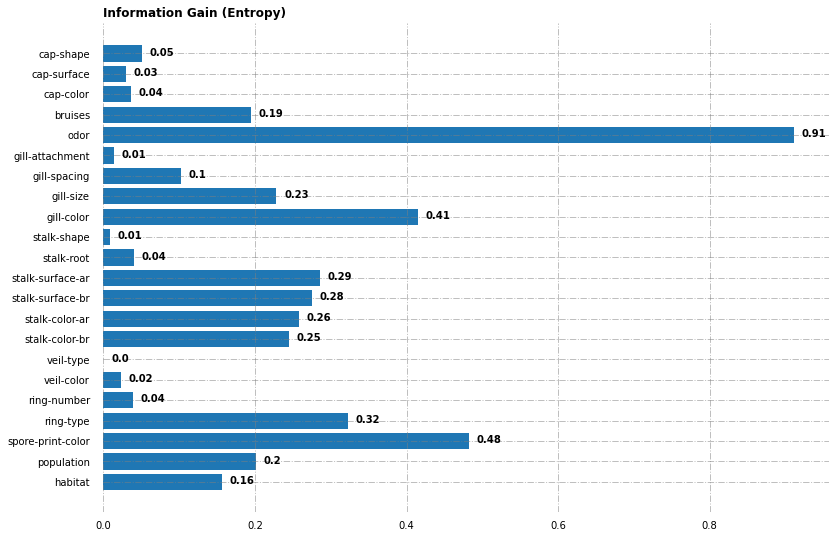

In [205]:
# Make plots, tables and other results here# Plot of best info attributes entropy, gini, and misclass error
fig, ax = plt.subplots(figsize=(13, 9))
ax.barh(fullAttList, fullInfoGainENT)
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 1, alpha = 0.5)
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='black')
 
ax.set_title('Information Gain (Entropy)', loc ='left', fontweight ='bold')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

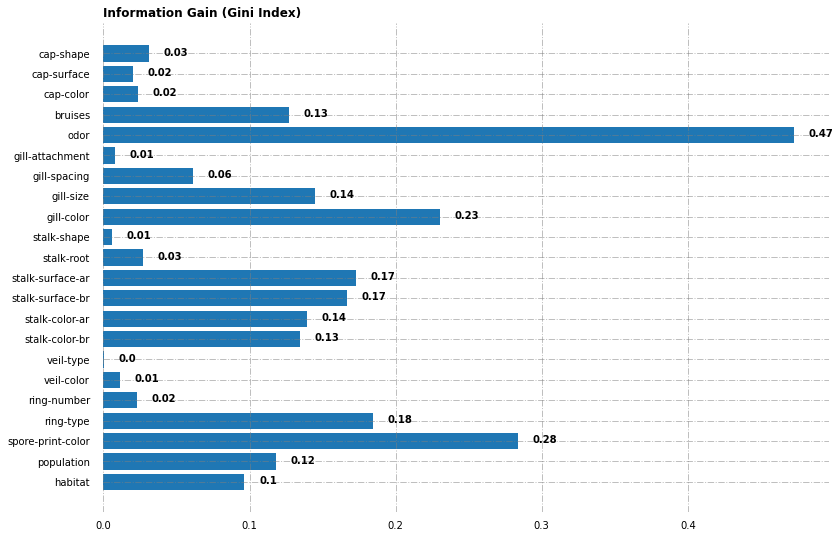

In [206]:
# Make plots, tables and other results here# Plot of best info attributes entropy, gini, and misclass error
fig, ax = plt.subplots(figsize=(13, 9))
ax.barh(fullAttList, fullInfoGainGINI)
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 1, alpha = 0.5)
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='black')
 
ax.set_title('Information Gain (Gini Index)', loc ='left', fontweight ='bold')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

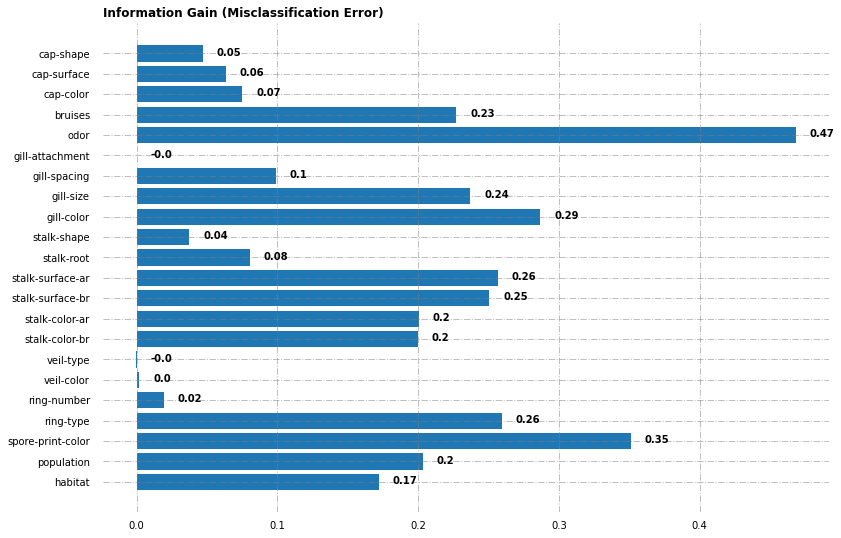

In [207]:
# Make plots, tables and other results here# Plot of best info attributes entropy, gini, and misclass error
fig, ax = plt.subplots(figsize=(13, 9))
ax.barh(fullAttList, fullInfoGainME)
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 1, alpha = 0.5)
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='black')
 
ax.set_title('Information Gain (Misclassification Error)', loc ='left', fontweight ='bold')
# plt.savefig("PCA_variance.png", bbox_inches='tight', dpi=200)
# files.download("PCA_variance.png")
plt.show()

In [216]:
def calcAllChi2(train_data, alpha):
  print('Alpha: ', alpha)
  allChi2 = []
  for feat in train_data:
    corr, chi2Curr = chi2(train_data[feat], alpha)
    # print('', feat, 'with', chi2Curr, 'chi2 value and correlated =', corr)
    allChi2.append(chi2Curr)
  return allChi2

In [217]:
fullChi2 = calcAllInfoGain(df_train, 0.05)
fullChi2.pop(0)
print(fullChi2)

Impurity Type:  0.05
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


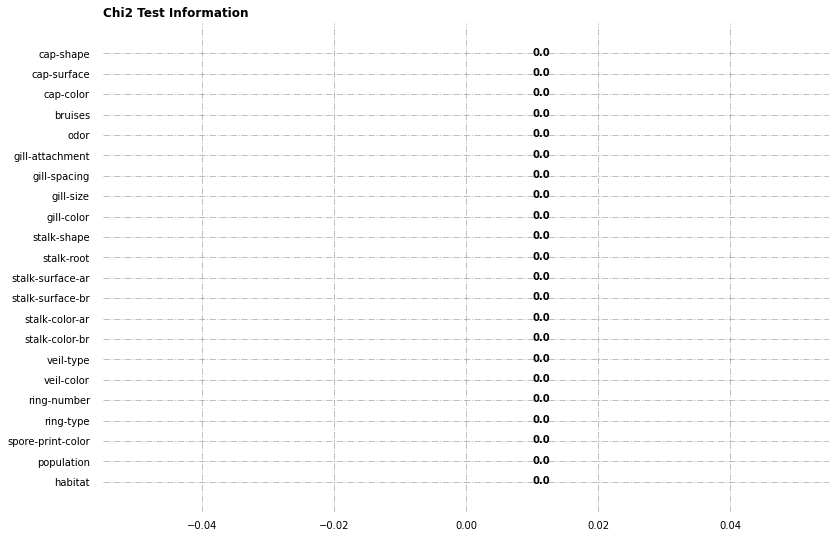

In [215]:
# Plot of accuracy
# Make plots, tables and other results here# Plot of best info attributes entropy, gini, and misclass error
fig, ax = plt.subplots(figsize=(13, 9))
ax.barh(fullAttList, fullChi2)
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 1, alpha = 0.5)
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='black')
 
ax.set_title('Chi2 Test Information', loc ='left', fontweight ='bold')
# plt.savefig("PCA_variance.png", bbox_inches='tight', dpi=200)
# files.download("PCA_variance.png")
plt.show()